In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
     

In [4]:
base_model = VGG19(weights='imagenet',include_top=False,input_shape=(32,32,3))

80134624/80134624 [==============================] - 1s 0us/step


In [5]:
for layer in base_model.layers:
  layer.trainable = False

In [6]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512,activation=("relu")))
model.add(Dropout(0.5))
model.add(Dense(10,activation=("softmax")))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 20,292,170
Trainable params: 267,786
Non-trainable params: 20,024,384
_________________________________________________________________


In [8]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
     

In [9]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)


In [10]:
model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[learning_rate_reduction])

Epoch 1/100
782/782 [==============================] - 25s 18ms/step - loss: 1.5008 - accuracy: 0.4718 - val_loss: 1.3242 - val_accuracy: 0.5343 - lr: 0.0010
Epoch 2/100
782/782 [==============================] - 13s 16ms/step - loss: 1.3255 - accuracy: 0.5314 - val_loss: 1.2373 - val_accuracy: 0.5647 - lr: 0.0010
Epoch 3/100
782/782 [==============================] - 14s 17ms/step - loss: 1.2662 - accuracy: 0.5559 - val_loss: 1.2309 - val_accuracy: 0.5633 - lr: 0.0010
Epoch 4/100
782/782 [==============================] - 13s 17ms/step - loss: 1.2350 - accuracy: 0.5653 - val_loss: 1.1947 - val_accuracy: 0.5821 - lr: 0.0010
Epoch 5/100
782/782 [==============================] - 13s 17ms/step - loss: 1.2041 - accuracy: 0.5749 - val_loss: 1.1817 - val_accuracy: 0.5819 - lr: 0.0010
Epoch 6/100
782/782 [==============================] - 13s 16ms/step - loss: 1.1826 - accuracy: 0.5818 - val_loss: 1.1783 - val_accuracy: 0.5876 - lr: 0.0010
Epoch 7/100
782/782 [==============================]

In [11]:
metrics = pd.DataFrame(model.history.history)

<Axes: >

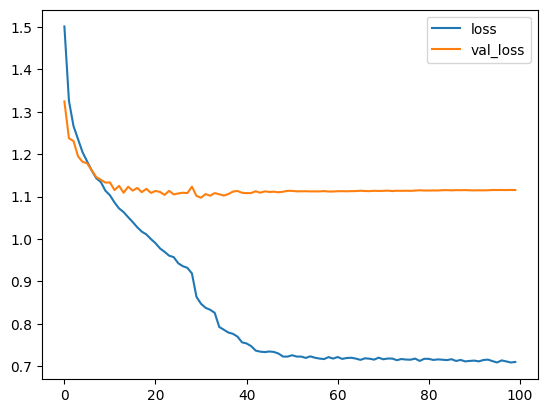

In [12]:
metrics[['loss','val_loss']].plot()

<Axes: >

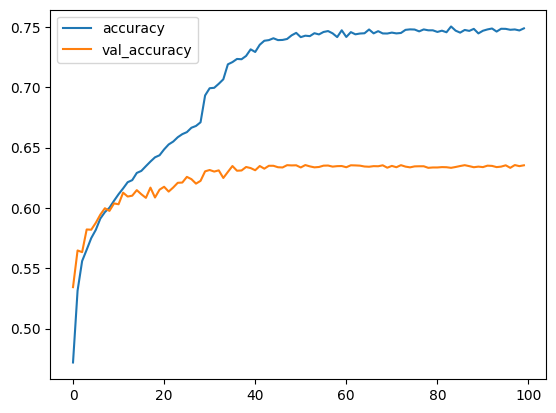

In [13]:
metrics[['accuracy','val_accuracy']].plot()

In [14]:
x_test_predictions = np.argmax(model.predict(x_test), axis=1)
print(confusion_matrix(y_test,x_test_predictions))

313/313 [==============================] - 3s 8ms/step
[[719  31  43  17  21  14  13  18  91  33]
 [ 27 705  14  27  11  12  21  13  46 124]
 [ 60  16 529  95  90  62  89  24  22  13]
 [ 18  48  63 467  55 154  84  36  26  49]
 [ 18  16  74  72 557  44  96  82  28  13]
 [ 13  26  50 162  61 554  51  51   9  23]
 [ 12  18  64  54  65  48 708   9  12  10]
 [ 16  15  47  39  78  67  21 676   9  32]
 [ 78  61  23  20  11   4   7   5 747  44]
 [ 33 118  13  29  15  14  18  25  44 691]]


In [15]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1000
           1       0.67      0.70      0.69      1000
           2       0.57      0.53      0.55      1000
           3       0.48      0.47      0.47      1000
           4       0.58      0.56      0.57      1000
           5       0.57      0.55      0.56      1000
           6       0.64      0.71      0.67      1000
           7       0.72      0.68      0.70      1000
           8       0.72      0.75      0.73      1000
           9       0.67      0.69      0.68      1000

    accuracy                           0.64     10000
   macro avg       0.63      0.64      0.63     10000
weighted avg       0.63      0.64      0.63     10000

